In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.express as px

In [ ]:
help

In [27]:
df = pd.read_csv('data/TestPad_PCB_XYRGB_V2.csv')

In [31]:
df_copy = df.copy()

In [32]:
df

X    Y         R         G         B  Grey
0       105    0  0.909804  0.976471  0.937255     0
1       106    0  0.792157  0.901961  0.843137     0
2       107    0  0.631373  0.788235  0.694118     0
3       108    0  0.474510  0.670588  0.556863     0
4       109    0  0.341176  0.584314  0.439216     0
...     ...  ...       ...       ...       ...   ...
723547  961  778  0.745098  0.917647  0.811765     0
723548  962  778  0.749020  0.917647  0.811765     0
723549  963  778  0.752941  0.909804  0.807843     0
723550  964  778  0.756863  0.905882  0.807843     0
723551  965  778  0.752941  0.901961  0.803922     0

[723552 rows x 6 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723552 entries, 0 to 723551
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       723552 non-null  int64  
 1   Y       723552 non-null  int64  
 2   R       723552 non-null  float64
 3   G       723552 non-null  float64
 4   B       723552 non-null  float64
 5   Grey    723552 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 33.1 MB


In [49]:
df.describe()

X              Y              R              G  \
count  723552.000000  723552.000000  723552.000000  723552.000000   
mean      482.818501     401.552602       0.311440       0.566461   
std       273.251249     219.575878       0.184321       0.134084   
min         0.000000       0.000000       0.027451       0.235294   
25%       248.000000     215.000000       0.168627       0.474510   
50%       483.000000     403.000000       0.239216       0.552941   
75%       718.000000     591.000000       0.427451       0.603922   
max       965.000000     778.000000       0.968627       0.976471   

                   B           Grey  
count  723552.000000  723552.000000  
mean        0.429304       0.016451  
std         0.156345       0.127201  
min         0.172549       0.000000  
25%         0.321569       0.000000  
50%         0.360784       0.000000  
75%         0.513725       0.000000  
max         0.976471       1.000000

In [34]:
def concatenate_values(x_pixel, y_pixel):
    return f"{x_pixel}|{y_pixel}"

In [35]:
df['pk'] = df.apply(lambda x: concatenate_values(x.X,x.Y), axis=1)

In [36]:
df.pk.value_counts().value_counts()

count
1    723552
Name: count, dtype: int64

In [37]:
df.head()

X  Y         R         G         B  Grey         pk
0  105  0  0.909804  0.976471  0.937255     0  105.0|0.0
1  106  0  0.792157  0.901961  0.843137     0  106.0|0.0
2  107  0  0.631373  0.788235  0.694118     0  107.0|0.0
3  108  0  0.474510  0.670588  0.556863     0  108.0|0.0
4  109  0  0.341176  0.584314  0.439216     0  109.0|0.0

In [77]:
df['avg_value'] = df.apply(lambda x: (x.R+x.G+x.B)*255/3, axis=1)

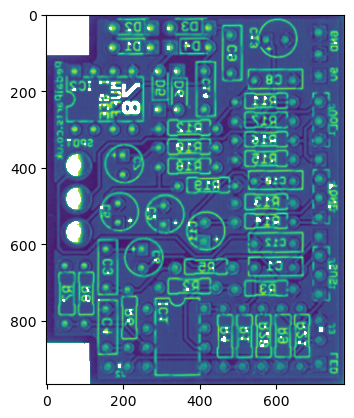

In [78]:
plt.imshow(df.pivot(index='X',columns='Y',values='avg_value').to_numpy())

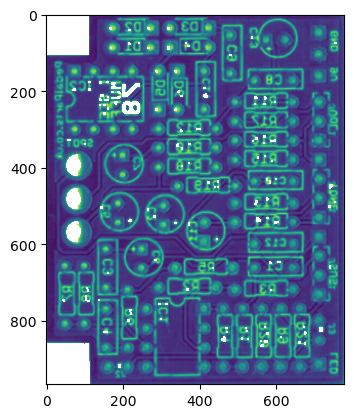

In [59]:
plt.imshow(df_copy.pivot(index='X',columns='Y',values='R').to_numpy())

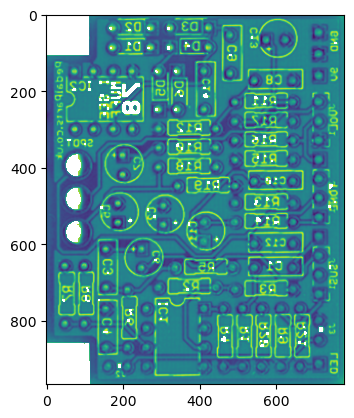

In [60]:
plt.imshow(df_copy.pivot(index='X',columns='Y',values='G').to_numpy())

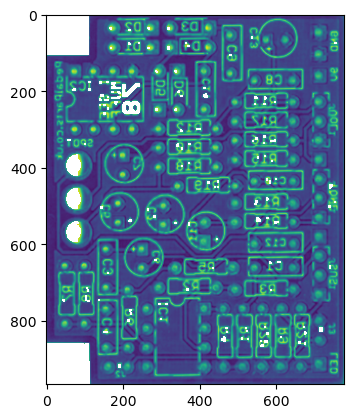

In [61]:
plt.imshow(df_copy.pivot(index='X',columns='Y',values='B').to_numpy())

In [186]:
def convert_to_numpy(dataframe: pd.DataFrame):

    red =dataframe.pivot(index='X',columns='Y',values='R').to_numpy()
    green =dataframe.pivot(index='X',columns='Y',values='G').to_numpy()
    blue =dataframe.pivot(index='X',columns='Y',values='B').to_numpy()
    
    return np.dstack((red, green, blue))

pcb_img = convert_to_numpy(df_copy)

c:\Users\mamah\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning:

invalid value encountered in cast



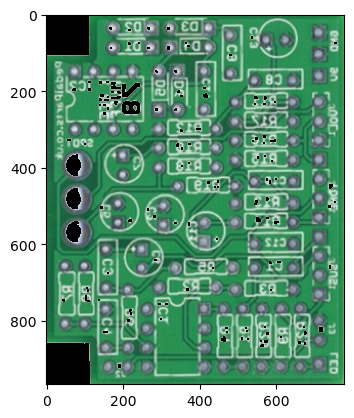

In [187]:
plt.imshow(pcb_img)

In [188]:
fig = px.imshow(pcb_img)
fig.show()

c:\Users\mamah\AppData\Local\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:245: RuntimeWarning:

invalid value encountered in cast



In [235]:
315-285

30

In [236]:
333-315

18

In [314]:
img_rgb = np.array([[[255, 0, 0], [0, 255, 0], [74.0,94.0,95.0]],
                    [[0, 255, 0], [0, 0, 255], [255, 0, 0]]
                   ], dtype=np.uint8)
fig = px.imshow(img_rgb)
fig.show()

In [191]:
df_copy2 = df_copy.copy()

In [194]:
def make_pixels_black(dataframe:pd.Series):
    
    if dataframe.X >= 356 and dataframe.X <= 475 and dataframe.Y >= 511 and dataframe.Y <= 629:
        return [0,0,0]
    else:
        return dataframe.R,dataframe.G,dataframe.B


In [201]:
# df_copy2[['R','G','B']] = 
HOLDER = df_copy2.apply(lambda x: make_pixels_black(x), axis=1, result_type='expand')

In [206]:
df_copy2[['R','G','B']] = HOLDER

In [209]:
blacked_pixels = convert_to_numpy(df_copy2)

In [211]:
fig = px.imshow(blacked_pixels)
fig.show()

c:\Users\mamah\AppData\Local\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:245: RuntimeWarning:

invalid value encountered in cast



In [ ]:
lower_limit = 85
upper_limit = 190
standard_deviation_cut <= 10

In [248]:
df_copy

X    Y         R         G         B  Grey
0       105    0  0.909804  0.976471  0.937255     0
1       106    0  0.792157  0.901961  0.843137     0
2       107    0  0.631373  0.788235  0.694118     0
3       108    0  0.474510  0.670588  0.556863     0
4       109    0  0.341176  0.584314  0.439216     0
...     ...  ...       ...       ...       ...   ...
723547  961  778  0.745098  0.917647  0.811765     0
723548  962  778  0.749020  0.917647  0.811765     0
723549  963  778  0.752941  0.909804  0.807843     0
723550  964  778  0.756863  0.905882  0.807843     0
723551  965  778  0.752941  0.901961  0.803922     0

[723552 rows x 6 columns]

In [280]:
df_copy[['R','G','B']] = df_copy[['R','G','B']].values*255

In [338]:
def compute_features(dataframe:pd.DataFrame):
    values_of_interest = dataframe[['R','G','B']].values
    return np.std(values_of_interest,axis=1, ddof = 1), np.mean(values_of_interest, axis=1)

In [339]:
df_copy['stdv'],df_copy['avg'] = compute_features(df_copy)

In [356]:
# this conditions determine what counts as gray pixels
# my initial cutoff point was 10 but upon visualising I realised 14 is great

stdv_vector = df_copy.stdv.values
avg_vector = df_copy.avg.values

df_copy['IsGray'] = np.where(stdv_vector<=14,1,0)*np.where(np.logical_and(avg_vector >= 85, avg_vector <= 190),1,0)

In [357]:
df_copy3 = df_copy.copy()

In [358]:
#for the sake of clarity I have coloured what a consider gray pixel as red

df_copy3[['R','G','B']] = df_copy3.apply(lambda x: [255,0,0] if x.IsGray==1 else [x.R,x.G,x.B], axis=1, result_type = 'expand')

In [359]:
new_pcb_img = convert_to_numpy(df_copy3)

In [360]:
fig = px.imshow(new_pcb_img)
fig.show()

c:\Users\mamah\AppData\Local\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:245: RuntimeWarning:

invalid value encountered in cast



In [346]:
df_copy3.query('X==875 and Y==421')

X    Y     R      G      B  Grey       stdv         avg  IsGray
379076  875  421  98.0  118.0  127.0     0  14.843629  114.333333       0

In [ ]:
875 421

In [345]:
fig = px.imshow(pcb_img)
fig.show()